### Try out a linear regression on the data with all features

In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms
import scipy.stats as stats

In [68]:
%store -r df

First we may check the correlations within the data. 

<AxesSubplot:>

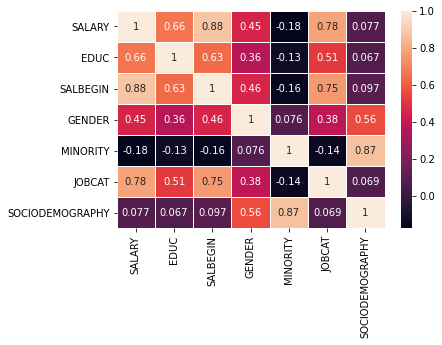

In [69]:
sns.heatmap(df.corr(),annot=True,lw=1)

To build a linear regression modell we cannot use the string columns (we could use dummy variables - but not this time).

In [70]:
df_X = df.drop(columns = ["SALARY", "GENDER_DENOTING", "MINORITY_DENOTING", "JOBCAT_DENOTING", "SOCIODEMOGRAPHY_DENOTING"])
Y = df["SALARY"]

Then we need to split the date into a subset of training observations (60% of the data) and a subset containg testing observations.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df_X, Y, test_size=0.4, random_state=17)
X_train

,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT,SOCIODEMOGRAPHY
470,15,15750,1,1,1,3
365,12,12000,0,1,1,2
350,12,13500,0,0,1,0
172,20,42480,1,0,3,1
65,19,30000,1,0,3,1
...,...,...,...,...,...,...
406,15,15750,1,0,1,1
390,12,12450,0,0,1,0
143,8,9750,0,0,1,0
241,12,18000,0,0,1,0


As linear regression model we use the sklearn.linear_model library. To fit the model means training it with our training subset of the data.

In [72]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Now we can use our trained model to predict salaries. For this we use the features from our testing subset of the data.

In [73]:
predictions = model.predict(X_test)

The RMSE can be calculated by the sklearn.metrics library.

In [74]:
mean_squared_error(y_test, predictions)**0.5

7115.874747063464

Now we can use this value to compare it with the other linear regression models.

To check wether our linear regression model has any blindsights we can plot the residuals that occur within our testing subset.

In [75]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = predictions, 
        y = y_test - predictions,
        mode="markers"
    )
)
fig.update_layout(
    xaxis_title = "Predicted Salaries",
    yaxis_title = "Residuals"
)
fig.show()

In [76]:
fig = go.Figure()
fig.add_trace(
    go.Histogram(
        x = y_test - predictions
    )
)
fig.update_layout(
    xaxis_title = "Residuals",
    yaxis_title = "Counts"
)
fig.show()

It looks as if the residuals are nearly normaly distributed. To check this we can use the quantile-quantile plot of the scipy.stats library.

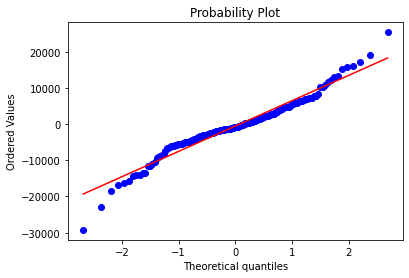

In [64]:
qq = stats.probplot(y_test-predictions, plot=plt)

In [ ]:
In the end we may use the statsmodels.api library to throw light on the statistical units.

In [35]:
X_train_sms = sms.add_constant(X_train)
ls=sms.OLS(y_train,X_train_sms).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     190.2
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          1.12e-101
Time:                        21:06:21   Log-Likelihood:                -2930.7
No. Observations:                 284   AIC:                             5877.
Df Residuals:                     276   BIC:                             5907.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Here it is shown that our R<sup>2</sup> rather high and the features `salary beginn`, `jobcatagory` and `education degree` are the most significant ones. 